## import library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# for evaluation
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Read Dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [6]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [7]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [8]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [9]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## Data Visualization

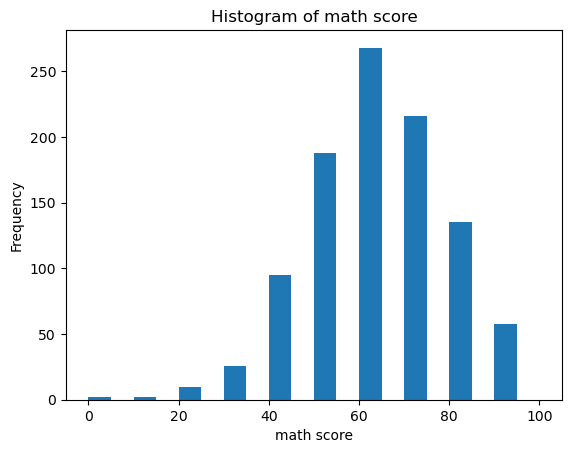

In [47]:
#histogram using matplotlib
plt.hist(df["math score"] , width = 5)
plt.xlabel("math score")
plt.ylabel("Frequency")
plt.title("Histogram of math score")
plt.show()

<AxesSubplot:ylabel='parental level of education'>

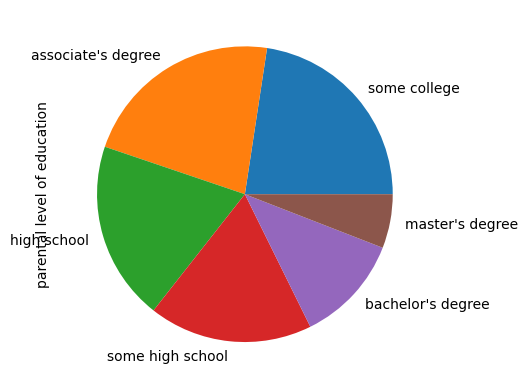

In [49]:
df["parental level of education"].value_counts().plot(kind = 'pie')

## Data Preprocessiong

In [10]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [11]:
x = df.drop(columns= ['math score'], axis = 1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
# select numerical columns
numerical_df = x.select_dtypes(exclude = 'object').columns

In [13]:
numerical_df

Index(['reading score', 'writing score'], dtype='object')

In [14]:
# select catgorical columns
categorical_df = x.select_dtypes(include = 'object').columns
categorical_df

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [15]:
categorical_df = [feature for feature in categorical_df if feature != 'parental level of education']
categorical_df

['gender', 'race/ethnicity', 'lunch', 'test preparation course']

In [16]:
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

In [17]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [18]:
ordinal_encoder = OrdinalEncoder(categories = [['some high school', 'high school', 'some college',
                                                "associate's degree", "bachelor's degree",
                                                "master's degree"]])

In [19]:
preprocessing = ColumnTransformer([
    ('OneHotEncoder' ,one_hot_encoder , categorical_df) ,
    ('OrdinalEncoder', ordinal_encoder , ['parental level of education']),
    ('StandardScaler', scaler ,numerical_df)
])

In [20]:
x = preprocessing.fit_transform(x)


In [21]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  4.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  5.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.15336989,  1.18158627]])

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.25 , random_state = 42)

## Model Training

In [27]:
def evaluate_model(actual, predicted):
    MAE = mean_absolute_error(actual, predicted)
    MSE = mean_squared_error(actual, predicted)
    RMSE = np.sqrt(mean_squared_error(actual, predicted))
    R2_Score = r2_score(actual , predicted)
    return MAE , MSE , RMSE , R2_Score

In [29]:
models = {
    "Linear Regression" :LinearRegression(),
    "KNN Regressor" : KNeighborsRegressor(),
    "Desision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGB Model" : XGBRegressor()
}

In [30]:
models_list = []
r2_list = []

In [34]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train , y_train)
    
    
    # model prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #model evaluation
    Train_MAE , Train_MSE , Train_RMSE , Train_R2 = evaluate_model(y_train, y_train_pred)
    Test_MAE , Test_MSE , Test_RMSE , Test_R2 = evaluate_model(y_train, y_train_pred)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print("Model Training Preformance: ")
    print("Mean Absolute Error = " , Train_MAE)
    print("Mean Squared  Error = ", Train_MSE)
    print("Root Mean Squared  Error = ", Train_RMSE)
    print("R2 Score Error = ", Train_R2)
    
    print("________________________________________")
    
    print("Model test Preformance: ")
    print("Mean Absolute Error = " , Test_MAE)
    print("Mean Squared  Error = ", Test_MSE)
    print("Root Mean Squared  Error = ", Test_RMSE)
    print("R2 Score Error = ", Test_R2)
    
    r2_list.append(Test_R2)
    
    

Linear Regression
Model Training Preformance: 
Mean Absolute Error =  4.248659520180561
Mean Squared  Error =  28.198427765300366
Root Mean Squared  Error =  5.310219182416143
R2 Score Error =  0.8736566142040182
________________________________________
Model test Preformance: 
Mean Absolute Error =  4.248659520180561
Mean Squared  Error =  28.198427765300366
Root Mean Squared  Error =  5.310219182416143
R2 Score Error =  0.8736566142040182
KNN Regressor
Model Training Preformance: 
Mean Absolute Error =  4.525066666666667
Mean Squared  Error =  32.21136
Root Mean Squared  Error =  5.6755052638509635
R2 Score Error =  0.8556766243364382
________________________________________
Model test Preformance: 
Mean Absolute Error =  4.525066666666667
Mean Squared  Error =  32.21136
Root Mean Squared  Error =  5.6755052638509635
R2 Score Error =  0.8556766243364382
Desision Tree
Model Training Preformance: 
Mean Absolute Error =  0.02
Mean Squared  Error =  0.08333333333333333
Root Mean Squared 

In [36]:
scores_df = pd.DataFrame(list(zip(models_list , r2_list)) , 
                         columns = ['Model Name' ,'R2_Score']).sort_values(by = ['R2_Score'], ascending = False)

In [37]:
scores_df

,Model Name,R2_Score
2,Desision Tree,0.999627
4,XGB Model,0.995654
3,Random Forest,0.976742
0,Linear Regression,0.873657
1,KNN Regressor,0.855677


In [38]:
model = DecisionTreeRegressor()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

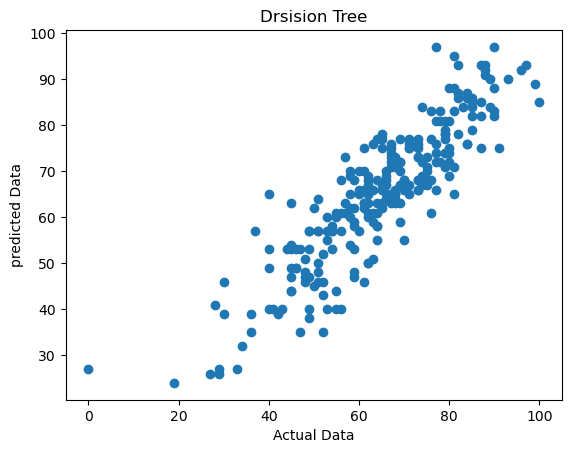

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Data")
plt.ylabel("predicted Data")
plt.title("Drsision Tree")
plt.show()

<AxesSubplot:xlabel='math score'>

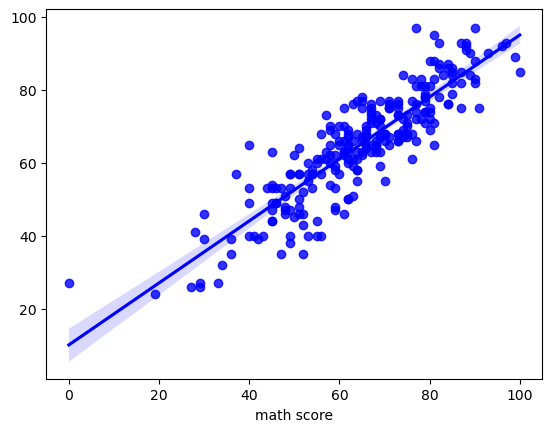

In [40]:
sns.regplot(x = y_test , y = y_pred , color = 'blue')

In [41]:
prediction_df= pd.DataFrame({'Actual Values': y_test,
                             'Predicted Values' : y_pred,
                             'Diffirance' : y_test  - y_pred})

In [42]:
prediction_df

,Actual Values,Predicted Values,Diffirance
521,91,75.0,16.0
737,53,60.0,-7.0
740,80,75.0,5.0
660,74,84.0,-10.0
411,84,76.0,8.0
...,...,...,...
109,70,55.0,15.0
430,64,61.0,3.0
77,80,81.0,-1.0
84,42,39.0,3.0
